# ANALYTICS CAPSTONE PROJECT (by Prof.Krystyn Gutu)
# PROJECT: “DeepGuard”: High-Accuracy Credit Card Fraud Detection
## CRN:-74233 ; FALL 2023
## Submitted by: Piyush Gupta

##  Import Necessary Libraries

1. **pandas (pd):** A comprehensive library providing high-performance, easy-to-use data structures such as DataFrames. Essential for data manipulation, cleaning, and analysis.

2. **matplotlib.pyplot (plt):** A plotting library that allows for the creation of static, animated, and interactive visualizations in Python, offering a wide array of customization options.

3. **seaborn (sns):** A data visualization library that works on top of Matplotlib, offering a higher-level, more convenient interface for creating stylish and informative statistical graphics.

4. **train_test_split:** A Scikit-learn function enabling the easy splitting of datasets into random train and test subsets, ensuring that models have unseen data for validation.

5. **StandardScaler:** A preprocessing utility from Scikit-learn that standardizes features by removing the mean and scaling to unit variance, a common requirement for many machine learning algorithms.

6. **confusion_matrix, accuracy_score, roc_curve, auc, classification_report:** A collection of metrics from Scikit-learn used to evaluate the quality and performance of classification models, helping in understanding model effectiveness.

7. **resample:** A Scikit-learn utility for resampling datasets, it’s instrumental when working with imbalanced data by allowing both oversampling of the minority class and undersampling of the majority class.

8. **RandomForestClassifier:** A Scikit-learn ensemble method that fits multiple decision trees to various sub-samples, improving model accuracy and control over overfitting.

9. **LogisticRegression:** A classifier from Scikit-learn suitable for binary or multiclass classification tasks, estimating the probability of class membership.

10. **KNeighborsClassifier:** Part of Scikit-learn, this algorithm is based on instance-based or memory-based learning, utilized for both classification and regression.

11. **DecisionTreeClassifier:** A Scikit-learn classifier which uses a decision tree as a predictive model, mapping features to conclusions about the target value.

12. **RandomOverSampler:** From the imbalanced-learn library, it helps to balance classes by randomly picking samples from the minority class to match the majority class’s number of instances.

13. **tensorflow (tf):** A robust open-source library that allows the building, training, and deployment of a variety of machine learning and neural network models.

14. **Sequential:** A linear stacking of layers from TensorFlow, allowing for easy model building through the sequential addition of layers.

15. **Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense:** Layers and functions from TensorFlow, pivotal in constructing and tuning the architecture of neural network models.

16. **EarlyStopping:** A TensorFlow callback that offers a way to stop training when a monitored quantity has stopped improving, helping in preventing model overfitting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, recall_score,roc_auc_score, roc_curve, auc,precision_score,f1_score, classification_report
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

## Importing Dataset

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head() #Displaying the head of the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data pre-processing

**1. Checking the shape of the dataset - <br>The shape attribute of a DataFrame returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.**


In [4]:
df.shape

(284807, 31)

**2.The df.info() method provides a concise summary of the DataFrame. This includes information like the number of non-null entries in each column, the datatype of each column, and memory usage, among others. It is particularly useful to get a quick overview of the dataset, helping identify missing values and optimize data types for more efficient storage and computation.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
duplicate = df.duplicated() #Identifying Duplicate Rows 
print(duplicate.sum()) # Sum of Duplicates
df[duplicate] #Displaying Duplicate Rows 

1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


### Removing Duplicate Rows - 
The df.drop_duplicates(inplace=True) method is used to remove all the duplicate rows in the DataFrame. The inplace=True parameter means that the DataFrame will be modified in place, and nothing will be returned. This action is part of the data cleaning process, ensuring that the dataset has only unique entries and is ready for analysis or model training.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Viewing Data Types - 
Executing df.dtypes returns a Series with the data type of each column. Understanding the data types of each column is crucial as it affects what kind of operations can be performed on the columns. It helps in identifying if any column needs a type conversion.

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Statistical Summary - 
The df.describe() method is used to generate a statistical summary of the DataFrame. This includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values for all numeric columns. It is a useful method for a quick statistical overview and to understand the distribution of the data in the DataFrame.

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Counting Unique Values in a Column 
The df.Class.value_counts() method is used to display the count of unique values present in the 'Class' column of the DataFrame. This is helpful in understanding the distribution of different categories or classes within the column, which is especially crucial in classification tasks to identify if the classes are balanced or imbalanced.

In [11]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

### Visualization of Fraud and Non-Fraud Transactions
This is utilized for visualizing the distribution of fraud and non-fraud transactions in the 'Class' column of the DataFrame. We uses the seaborn library for creating a countplot, which is a categorical plot. 

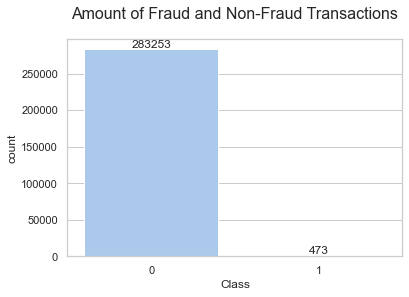

In [12]:
# Visualize the amount of Fraud and Non-Fraud transactions
sns.set(style="whitegrid")
ax = sns.countplot(x='Class', data=df, order=[0, 1], label='Count', palette='pastel')
counts = df['Class'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
title = "Amount of Fraud and Non-Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)
plt.show()

### Correlation Visualization Between Features and Target Class 
This is dedicated to visualizing the correlation between each feature in the dataset and the target class ('Class'). It helps to understand the relationship and influence of each feature on the outcome. 

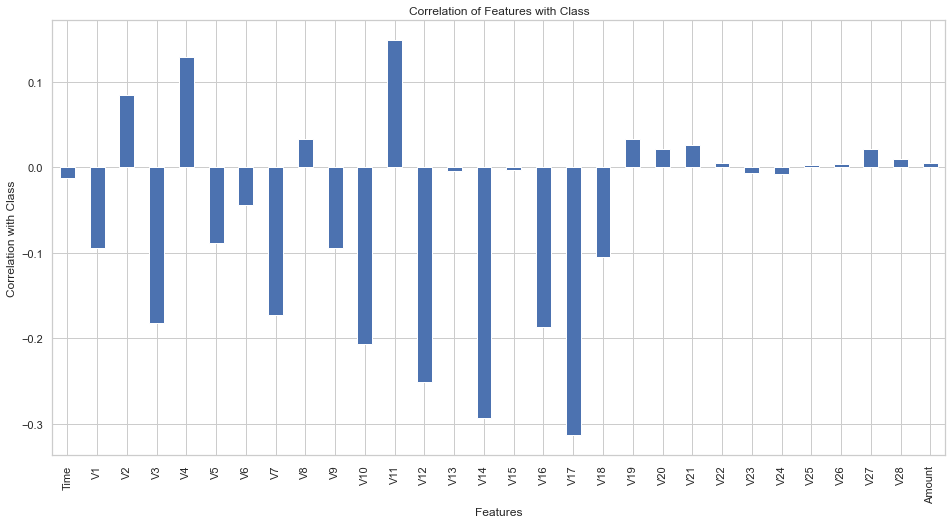

In [13]:
dataset_2 = df.drop(columns=['Class'])
correlation_with_class = dataset_2.corrwith(df['Class'])
correlation_with_class.plot.bar(figsize=(16, 8), grid=True)
plt.xlabel("Features")
plt.ylabel("Correlation with Class")
plt.title("Correlation of Features with Class")
plt.show()

### Correlation Heatmap Visualization 
We create a heatmap that visually represents the correlation between all pairs of features in the DataFrame, including the target class. It provides a comprehensive overview of how each attribute interacts with the others.

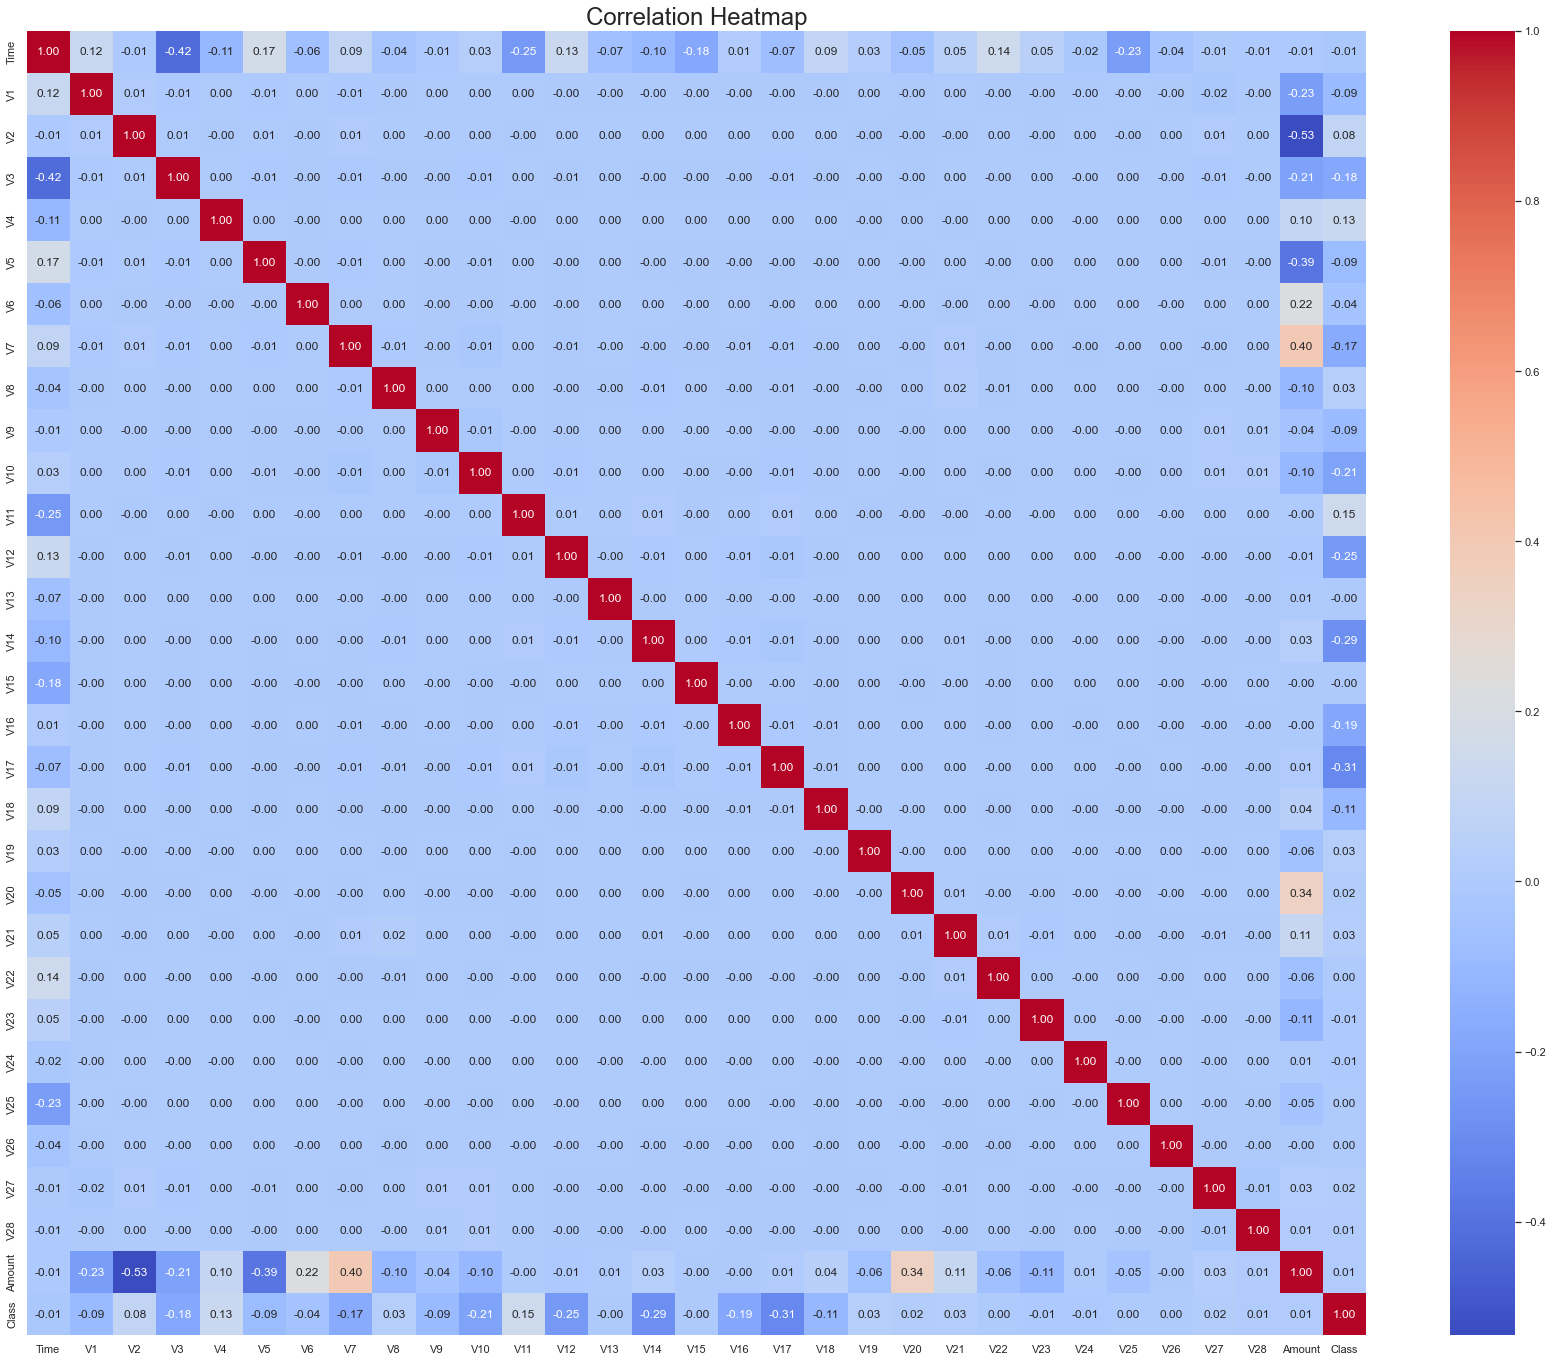

In [14]:
corr = df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=24)
plt.show()

In [15]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Calculating and Printing Feature-Target Correlations 
To calculating and printing the correlation of each feature in the dataset with the target variable ('Class'), expressed as percentages. 

In [16]:
target_column='Class'
# Calculate and print correlation of each feature with the target variable in percentages
for column in df.columns:
    if column != target_column:  # avoid comparing the target column with itself
        correlation = df[column].corr(df[target_column]) * 100  # convert to percentage
        print(f"Correlation of {column} with {target_column}: {correlation:.2f}%")


Correlation of Time with Class: -1.24%
Correlation of V1 with Class: -9.45%
Correlation of V2 with Class: 8.46%
Correlation of V3 with Class: -18.23%
Correlation of V4 with Class: 12.93%
Correlation of V5 with Class: -8.78%
Correlation of V6 with Class: -4.39%
Correlation of V7 with Class: -17.23%
Correlation of V8 with Class: 3.31%
Correlation of V9 with Class: -9.40%
Correlation of V10 with Class: -20.70%
Correlation of V11 with Class: 14.91%
Correlation of V12 with Class: -25.07%
Correlation of V13 with Class: -0.39%
Correlation of V14 with Class: -29.34%
Correlation of V15 with Class: -0.33%
Correlation of V16 with Class: -18.72%
Correlation of V17 with Class: -31.35%
Correlation of V18 with Class: -10.53%
Correlation of V19 with Class: 3.36%
Correlation of V20 with Class: 2.15%
Correlation of V21 with Class: 2.64%
Correlation of V22 with Class: 0.49%
Correlation of V23 with Class: -0.63%
Correlation of V24 with Class: -0.72%
Correlation of V25 with Class: 0.32%
Correlation of V26 

### Removing Negatively Correlated Features - 
Identifying features that are negatively correlated with the target column ('Class') and removing them from the DataFrame. This process can help in focusing on the features that have a more positive correlation with the target, potentially improving the performance of predictive models.

In [17]:
target_column = 'Class'  # specify the target column

# Initialize a list to hold the names of the features to be dropped
columns_to_drop = []

# Calculate the correlation of each feature with the target variable
# and append negatively correlated features to the list
for column in df.columns:
    if column != target_column:  # avoid comparing the target column with itself
        correlation = df[column].corr(df[target_column])
        if correlation < 0:
            columns_to_drop.append(column)

# Drop the negatively correlated features from the dataset
df_cleaned = df.drop(columns=columns_to_drop)

# Print the cleaned dataset
print(df_cleaned.head())


         V2        V4        V8       V11       V19       V20       V21  \
0 -0.072781  1.378155  0.098698 -0.551600  0.403993  0.251412 -0.018307   
1  0.266151  0.448154  0.085102  1.612727 -0.145783 -0.069083 -0.225775   
2 -1.340163  0.379780  0.247676  0.624501 -2.261857  0.524980  0.247998   
3 -0.185226 -0.863291  0.377436 -0.226487 -1.232622 -0.208038 -0.108300   
4  0.877737  0.403034 -0.270533 -0.822843  0.803487  0.408542 -0.009431   

        V22       V25       V26       V27       V28  Amount  Class  
0  0.277838  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1 -0.638672  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2  0.771679 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.005274  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  0.798278 -0.206010  0.502292  0.219422  0.215153   69.99      0  



### Displaying the Cleaned DataFrame and Its Shape 
Focused on showcasing the final state of the DataFrame after it has undergone the cleaning process and the removal of negatively correlated features.

In [18]:
df_cleaned

,V2,V4,V8,V11,V19,V20,V21,V22,V25,V26,V27,V28,Amount,Class
0,-0.072781,1.378155,0.098698,-0.551600,0.403993,0.251412,-0.018307,0.277838,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.266151,0.448154,0.085102,1.612727,-0.145783,-0.069083,-0.225775,-0.638672,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.340163,0.379780,0.247676,0.624501,-2.261857,0.524980,0.247998,0.771679,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.185226,-0.863291,0.377436,-0.226487,-1.232622,-0.208038,-0.108300,0.005274,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.877737,0.403034,-0.270533,-0.822843,0.803487,0.408542,-0.009431,0.798278,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,10.071785,-2.066656,7.305334,-1.593105,-0.682920,1.475829,0.213454,0.111864,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.055080,-0.738589,0.294869,-0.150189,-1.545556,0.059616,0.214205,0.924384,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,-0.301254,-0.557828,0.708417,0.411614,-0.577252,0.001396,0.232045,0.578229,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,0.530483,0.689799,0.679145,-1.933849,2.897849,0.127434,0.265245,0.800049,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
df_cleaned.shape

(283726, 14)

### Splitting the DataFrame into Features and Target 
Segregating the dataset into features (X) and target labels (Y). The feature set includes all columns except 'Class', while the target set comprises only the 'Class' column.

In [20]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((283726, 30), (283726,))

### Splitting the Dataset into Training and Testing Sets 
Dedicated to dividing the dataset into training and testing subsets. This separation is crucial for training and evaluating machine learning models. 

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(198608, 30) (198608,)
(85118, 30) (85118,)


### Implementing a machine learning process. 
It involves splitting the dataset into training and test sets using the train_test_split function from scikit-learn. The features (X) and labels (Y) are split into training (xtrain, ytrain) and test (xtest, ytest) sets, where 70% of the data is used for training and 30% is used for testing. A random state is set to ensure reproducibility, and the data is shuffled before splitting to ensure randomness. The shapes of the resulting datasets are printed to verify the splitting process.

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(198608, 30) (198608,)
(85118, 30) (85118,)


**We're preparing our data for a technique known as "undersampling," which is essential when we deal with datasets where some classes are disproportionately represented. By executing merged = pd.concat([xtrain, ytrain], axis=1), we are effectively combining our feature set (xtrain) and the corresponding labels (ytrain) into a single DataFrame, naming it merged. This consolidation is crucial as it simplifies the subsequent processes where we manage the data to have a more balanced representation of classes.**

In [23]:
# Undersampling
merged = pd.concat([xtrain,ytrain],axis = 1)

### Separation of Majority and Minority Classes:

This step segregates the dataset into two groups based on class labels, isolating the majority and minority classes.

In [24]:
majority_class = merged[merged['Class'] == 0]
minority_class = merged[merged['Class'] == 1]

### Determination of Minority Class Count:

Here, the number of instances in the minority class is determined, guiding how much to undersample the majority class.

In [25]:
minority_count = len(minority_class)

### Random Undersampling of Majority Class:

The majority class is then undersampled randomly without replacement to match the number of samples in the minority class, ensuring equality.

In [26]:
majority_undersampled = resample(majority_class, replace=False, n_samples=minority_count, random_state=42)


### Combining Undersampled Majority and Minority Classes:

The undersampled majority class and the original minority class are concatenated, resulting in a balanced dataset, undersampled_merged, ready for further analysis and model training.

In [27]:
undersampled_merged = pd.concat([majority_undersampled, minority_class])

**Two different dataset handling techniques, undersampling and oversampling, are employed to manage class imbalance. For both techniques, a RandomForestClassifier is trained, and its performance metrics like accuracy, precision, recall, and F1 score are computed and displayed.**

**Undersampling:**
A portion of the data, specifically from the X_undersample and y_undersample datasets, is allocated for training and testing. The classifier is trained and evaluated, and the performance metrics are calculated.

**Oversampling:**
The classifier is similarly trained and evaluated using the oversampled datasets X_ros and y_ros, followed by the calculation of performance metrics.

**Comparison and Decision-making:**
The F1 scores from both techniques are compared. If the F1 score from undersampling is higher, it suggests proceeding with undersampling; otherwise, oversampling is recommended. This decision-making process is based on the F1 score, which is a harmonic mean of precision and recall and provides a balance between the two, making it a crucial metric in evaluating model performance. This explanation aims to clarify the methodology and decision-making process involved in choosing between undersampling and oversampling based on model performance.







In [28]:
X_undersample = undersampled_merged.drop("Class", axis = 1)
y_undersample = undersampled_merged["Class"]

In [29]:
#Oversampling
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(xtrain, ytrain)

In [30]:
# Oversampled dataset
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,test_size = 0.3,random_state = 0)

In [31]:
# Undersampled dataset
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=0)

# Create classifier
clf = RandomForestClassifier(random_state=0)

# Train on undersampled data
clf.fit(X_train_under, y_train_under)
y_pred_under = clf.predict(X_test_under)

# Metrics for undersampled data
accuracy_under = accuracy_score(y_test_under, y_pred_under)
precision_under = precision_score(y_test_under, y_pred_under)
recall_under = recall_score(y_test_under, y_pred_under)
f1_under = f1_score(y_test_under, y_pred_under)

# Train on oversampled data
clf.fit(X_train_ros, y_train_ros)
y_pred_ros = clf.predict(X_test_ros)

# Metrics for oversampled data
accuracy_ros = accuracy_score(y_test_ros, y_pred_ros)
precision_ros = precision_score(y_test_ros, y_pred_ros)
recall_ros = recall_score(y_test_ros, y_pred_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)

# Print and compare metrics
print("Undersampling Metrics")
print("Accuracy:", accuracy_under)
print("Precision:", precision_under)
print("Recall:", recall_under)
print("F1 score:", f1_under)

print("\nOversampling Metrics")
print("Accuracy:", accuracy_ros)
print("Precision:", precision_ros)
print("Recall:", recall_ros)
print("F1 score:", f1_ros)

# Decision-making
# Replace the following condition based on what metrics are important for your case
if f1_under > f1_ros:
    print("\nUndersampling gives a better F1 score. Proceed with undersampling.")
else:
    print("\nOversampling gives a better F1 score. Proceed with oversampling.")


Undersampling Metrics
Accuracy: 0.9411764705882353
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1 score: 0.9433962264150944

Oversampling Metrics
Accuracy: 0.9999411576806039
Precision: 0.9998813941273149
Recall: 1.0
F1 score: 0.9999406935466105

Oversampling gives a better F1 score. Proceed with oversampling.


## MACHINE LEARNING ALGORITHM

### Logistic Regression
Initializing a logistic regression model by creating an instance of the LogisticRegression class from the Scikit-learn library (sklearn).Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome

In [32]:
model = LogisticRegression()

In [33]:
model.fit(xtrain,ytrain)

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
train=model.predict(xtrain)
test=model.predict(xtest)

In [35]:
tn, fp, fn, tp = confusion_matrix(ytest, test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,86,48
Not Fraud,37,84947


<AxesSubplot:>

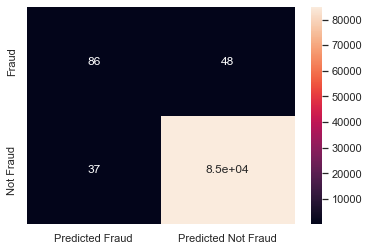

In [36]:
sns.heatmap(conf_matrix,annot=True)

In [37]:
accuracy = accuracy_score(ytest, test)
accuracy

0.9990013863107686

In [38]:
precision=precision_score(ytest,test)
precision

0.6991869918699187

In [39]:
recall=recall_score(ytest,test)

In [40]:
f1 = f1_score(ytest, test)
f1

0.6692607003891051

In [41]:
print("---------- classification report of logistic regression---------")
print(classification_report(ytest, test))

print("--------------- Accuracy of logistic regression ----------------")
print(f"Accuracy:- {accuracy}")
print(f"F1-Score:- {f1}")
print(f"Precision:- {precision}")

---------- classification report of logistic regression---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.70      0.64      0.67       134

    accuracy                           1.00     85118
   macro avg       0.85      0.82      0.83     85118
weighted avg       1.00      1.00      1.00     85118

--------------- Accuracy of logistic regression ----------------
Accuracy:- 0.9990013863107686
F1-Score:- 0.6692607003891051
Precision:- 0.6991869918699187


In [42]:
lr_pred_test_prob = model.predict_proba(xtest)[:, 1]

In [43]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [44]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.885955310639685

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

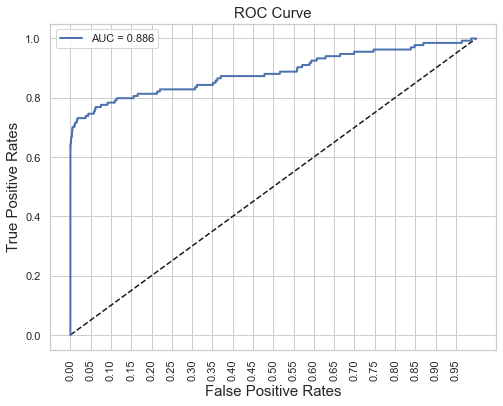

In [46]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

## Decision Tree
 A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node.

In [47]:
#decision tree
dt_model = DecisionTreeClassifier()

In [48]:
# Training the algorithm
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [49]:
# Predictions on training and testing data
dt_pred_train = dt_model.predict(xtrain)
dt_pred_test = dt_model.predict(xtest)

In [50]:
tn, fp, fn, tp = confusion_matrix(ytest, dt_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,106,28
Not Fraud,43,84941


<AxesSubplot:>

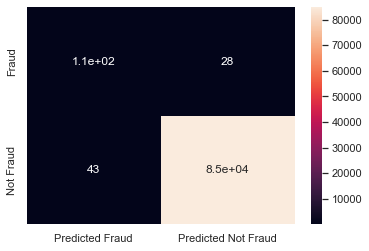

In [51]:
sns.heatmap(conf_matrix, annot=True)

In [52]:
# accuracy
dt_accuracy = accuracy_score(ytest, dt_pred_test)
dt_accuracy

0.9991658638595832

In [53]:
#precision
dt_precision = precision_score(ytest, dt_pred_test)
dt_precision

0.7114093959731543

In [54]:
#recall
dt_recall = recall_score(ytest, dt_pred_test)
dt_recall

0.7910447761194029

In [55]:
#f1 score
dt_f1 = f1_score(ytest, dt_pred_test)
dt_f1

0.7491166077738515

In [56]:
print("---------- classification report of decision tree---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of decision tree----------------")
print(f"Accuracy:- {dt_accuracy}")
print(f"F1-Score:- {dt_f1}")
print(f"Precision:- {dt_precision}")

---------- classification report of decision tree---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.70      0.64      0.67       134

    accuracy                           1.00     85118
   macro avg       0.85      0.82      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of decision tree----------------
Accuracy:- 0.9991658638595832
F1-Score:- 0.7491166077738515
Precision:- 0.7114093959731543


In [57]:
dt_pred_test_prob = dt_model.predict_proba(xtest)[:, 1]

In [58]:
fpr, tpr, _ = roc_curve(ytest, dt_pred_test_prob)

In [59]:
dt_auc = roc_auc_score(ytest, dt_pred_test_prob)
dt_auc

0.89526939926181

In [60]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

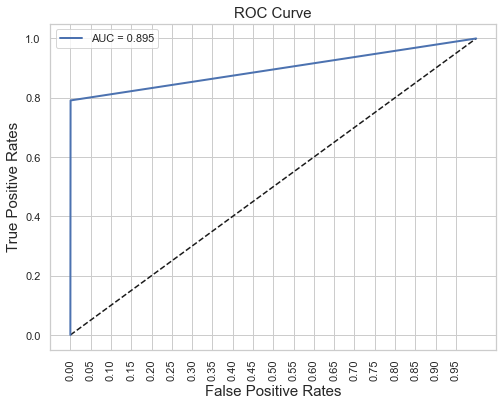

In [61]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % dt_auc)

## Random Forest
A random forest is an ensemble learning method for classification (and regression). It operates by constructing multiple decision trees during training and outputs the class that is the mode of the classes (classification) of the individual trees for prediction.

In [62]:
#random forest
rf_model = RandomForestClassifier()

In [63]:
# Training the algorithm
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [64]:
# Predictions on training and testing data
rf_pred_train = rf_model.predict(xtrain)
rf_pred_test = rf_model.predict(xtest)

In [65]:
tn, fp, fn, tp = confusion_matrix(ytest, rf_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,99,35
Not Fraud,5,84979


<AxesSubplot:>

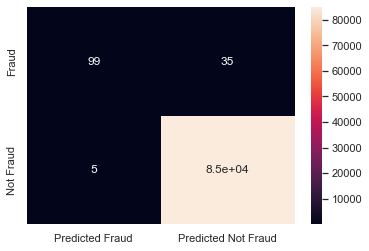

In [66]:
sns.heatmap(conf_matrix, annot=True)

In [67]:
rf_accuracy = accuracy_score(ytest, rf_pred_test)
rf_accuracy

0.999530064146244

In [68]:
rf_recall = recall_score(ytest, rf_pred_test)
rf_recall

0.7388059701492538

In [69]:
rf_f1 = f1_score(ytest, rf_pred_test)
rf_f1

0.8319327731092437

In [70]:
print("---------- classification report of random forest---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of random forest----------------")
print(f"Accuracy:- {rf_accuracy}")
print(f"F1-Score:- {rf_f1}")

---------- classification report of random forest---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.70      0.64      0.67       134

    accuracy                           1.00     85118
   macro avg       0.85      0.82      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of random forest----------------
Accuracy:- 0.999530064146244
F1-Score:- 0.8319327731092437


In [71]:
rf_pred_test_prob = rf_model.predict_proba(xtest)[:, 1]

In [72]:
fpr, tpr, threshold = roc_curve(ytest, rf_pred_test_prob)

In [73]:
rf_auc = roc_auc_score(ytest, rf_pred_test_prob)
rf_auc

0.9382813147619711

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

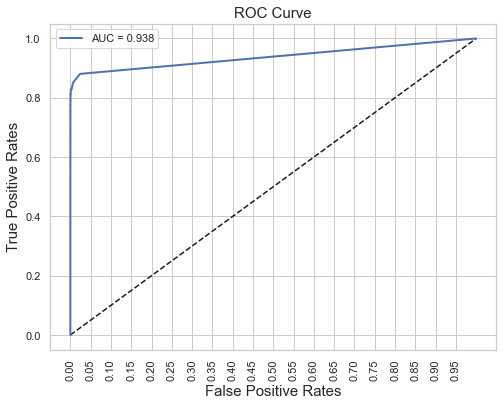

In [75]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % rf_auc)

## KNN
k-nearest neighbors (KNN) classifier from the Scikit-learn library. The KNN algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used for both classification and regression. It determines the label of a new instance based on the majority class of its k-nearest neighbors from the training dataset, where 'k' is a user-defined constant.

In [76]:
knn_model = KNeighborsClassifier()

In [77]:
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [78]:
knn_train=knn_model.predict(xtrain)
knn_test=knn_model.predict(xtest)

In [79]:
tn, fp, fn, tp = confusion_matrix(ytest, knn_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,4,130
Not Fraud,1,84983


<AxesSubplot:>

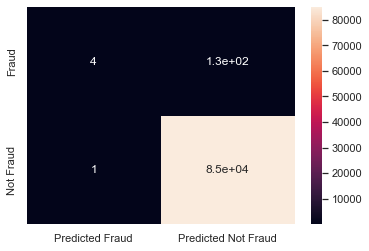

In [80]:
sns.heatmap(conf_matrix, annot=True)

In [81]:
accuracy = accuracy_score(ytest, knn_test)
accuracy

0.9984609600789492

In [82]:
precision=precision_score(ytest,knn_test)
precision

0.8

In [83]:
recall=recall_score(ytest,knn_test)
recall

0.029850746268656716

In [84]:
f1=f1_score(ytest,knn_test)
f1

0.05755395683453237

In [85]:
print("---------- classification report of KNN---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of KNN----------------")
print(f"Accuracy:- {accuracy}")
print(f"F1-Score:- {f1}")
print(f"Precision:- {precision}")

---------- classification report of KNN---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.70      0.64      0.67       134

    accuracy                           1.00     85118
   macro avg       0.85      0.82      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of KNN----------------
Accuracy:- 0.9984609600789492
F1-Score:- 0.05755395683453237
Precision:- 0.8


In [86]:
knn_pred_test_prob = knn_model.predict_proba(xtest)[:, 1]

In [87]:
fpr, tpr, threshold = roc_curve(ytest, knn_pred_test_prob)

In [88]:
knn_auc = roc_auc_score(ytest, knn_pred_test_prob)
knn_auc

0.5957400146261069

In [89]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')

    plt.show()

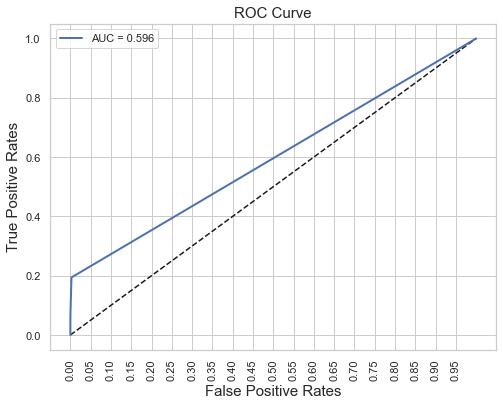

In [90]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % knn_auc)

## CNN
The architecture of a 1-dimensional Convolutional Neural Network (CNN) using TensorFlow’s Keras API

In [91]:
# Model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(units=64, activation='relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

In [92]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest), callbacks=[early_stopping])

Epoch 1/10
6207/6207 [==============================] - 94s 14ms/step - loss: 0.0104 - accuracy: 0.9985 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 2/10
6207/6207 [==============================] - 87s 14ms/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 3/10
6207/6207 [==============================] - 88s 14ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 4/10
6207/6207 [==============================] - 78s 13ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/10
6207/6207 [==============================] - 78s 13ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 6/10
6207/6207 [==============================] - 92s 15ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 7/10
6207/6207 [==============================] - 85s 14ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0035 -

In [94]:
# Evaluation
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2660/2660 [==============================] - 13s 5ms/step - loss: 0.0036 - accuracy: 0.9994
Test Loss: 0.0036306562833487988
Test Accuracy: 0.99935382604599


In [95]:
# Predictions and evaluation metrics
y_pred_prob = model.predict(xtest)
y_pred = (y_pred_prob > 0.5).astype(int)

2660/2660 [==============================] - 10s 4ms/step


In [96]:
# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[84968    16]
 [   39    95]]


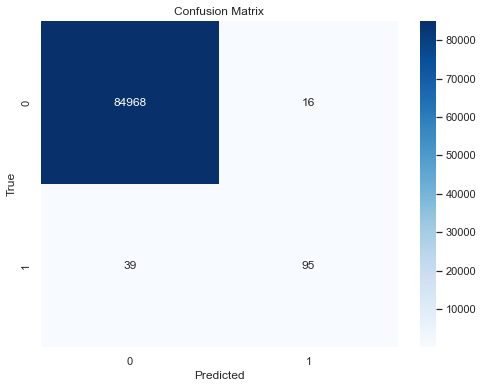

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [98]:
# Accuracy Score
acc_cm = accuracy_score(ytest, y_pred)
print("Accuracy:", acc_cm)

Accuracy: 0.9993538382010856


In [99]:
print("---------- classification report of CNN---------")
print(classification_report(ytest, test))

print("-----------------Accuracy of CNN----------------")
print(f"Accuracy:- {acc_cm}")

---------- classification report of CNN---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.70      0.64      0.67       134

    accuracy                           1.00     85118
   macro avg       0.85      0.82      0.83     85118
weighted avg       1.00      1.00      1.00     85118

-----------------Accuracy of CNN----------------
Accuracy:- 0.9993538382010856


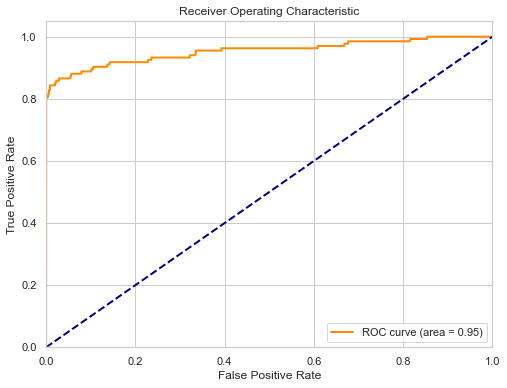

AUC Score: 0.9532698692361408


In [100]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC Score:", roc_auc)

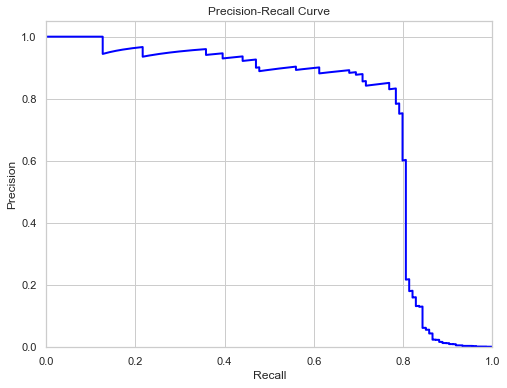

In [101]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ytest, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

Text(0, 0.5, 'Loss')

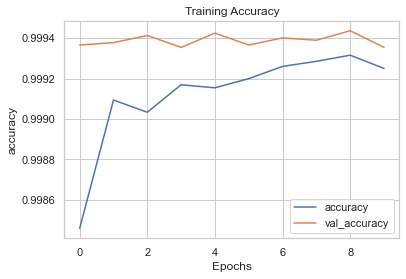

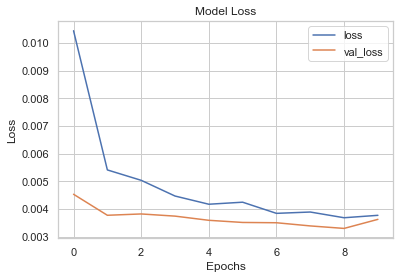

In [102]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')